# Demo Cluster Jerarquico

By Jean Carlo Alvarez

# Importar Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Librerías necesarias :

**import pandas as pd:** libreria usada para manipular y analizar datos en estructuras tipo tabla (DataFrame)

**import numpy as np:**  útil para realizar operaciones numéricas y trabajar con arrays multidimensionales

**import matplotlib.pyplot as plt:**  específicamente la función pyplot que se utiliza para crear gráficos y visualizaciones

**from sklearn import preprocessing**:  modulo preprocessing de scikit-learn  para preprocesar los datos como la normalización o escalado

**import scipy.cluster.hierarchy as shc:** Importamos scipy especificamente el modulo para hacer clusterización jerárquica, que se usa para agrupar datos en jerarquías

**from sklearn.cluster import AgglomerativeClustering:** AgglomerativeClustering de scikit-learn  es un algoritmo de clusterización jerárquica aglomerativa para agrupar los datos en clusters

# Cargar Datos

In [3]:
df = df = pd.read_csv('./Wholesale_customers_data.csv')
df=df.dropna()
df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
217,1,1,18044,1475,2046,2532,130,1158
419,1,3,8861,3783,2223,633,1580,1521
276,1,3,27901,3749,6964,4479,603,2503
352,1,3,608,1106,1533,830,90,195
95,1,3,3,2920,6252,440,223,709
327,1,2,542,899,1664,414,88,522
68,1,3,2446,7260,3993,5870,788,3095
272,1,1,514,8323,6869,529,93,1040
117,1,3,6990,3880,5380,1647,319,1160
383,1,3,1821,1364,3450,4006,397,361


**El dataset es de informacion de clietnes mayoristas**

## El codigo:

**df = pd.read_csv('./Wholesale_customers_data.csv'):**

Lee un archivo CSV ubicado en la ruta ./Wholesale_customers_data.csv y lo carga en un DataFrame llamado df usando la función read_csv de pandas

**df = df.dropna():**

Elimina cualquier fila del df que contenga valores faltantes o nulos  en cualquier columna

**df.sample(10):**

Muestra una muestra aleatoria de 10 filas del dataFrame  para obtener una visión rápida de los datos y verificar su contenido. El número 10 indica la cantidad de filas a mostrar

# Datos de Muestra

In [4]:
indices=[182,99,250]
df = df.drop(['Region','Channel'],axis=1)
muestra = pd.DataFrame(df.loc[indices],columns=df.keys()).reset_index(drop=True)

**indices = [182, 99, 250]:**

Define una lista indices que contiene los índices específicos de las filas que se quieren extraer del dataFrame Los índices son 182, 99 y 250

**df = df.drop(['Region','Channel'], axis=1):**

- Elimina las columnas Region y 'Channel del dataframw.

- El parámetro axis=1 indica que se están eliminando columnas (si fuera axis=0, se eliminarían filas)

**muestra = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True):**

-  **df.loc[indices]** para seleccionar las filas en los índices especificados en la lista indices

- **pd.DataFrame(df.loc[indices], columns=df.keys())**: Crea un nuevo dataframe muestra a partir de esas filas seleccionadas y nos aseguramos que las columnas del nuevo dataframe sean las mismas que las de df (esto se logra con columns=df.keys())

- **.reset_index(drop=True):** reinicia los índices de las filas en el dataframe muestra y elimina la columna de índice anterior (por eso usamos drop=True)

el codigo basicamente elimina las columnas Region y Channel selecciona tres filas específicas según los índices proporcionados y crea un nuevo dataframe con esas filas ademas de resetear los índices para que comiencen desde cero

**Razones para eliminar esas columnas**

- Relevancia para el analisis: Si las columnas Region y Channel no aportan información relevante para el análisis o el modelo que se va a construir, se eliminan para simplificar los datos y centrarse solo en las características necesarias

- Preprocesamiento: E las columnas que contienen información categorica, como Region y Channel, pueden no ser adecuadas para ciertos tipos de modelos de machine learning ahora si el objetivo es trabajar solo con datos numericos o un conjunto específico de caracteristicas se eliminan

- Evitar multicolinealidad: Si las columnas Region y Channel están altamente correlacionadas con otras características eliminarlas puede ayudar a evitar problemas de multicolinealidad que pueden afectar negativamente la precisión de algunos modelos estadísticos

Eliminar columnas es una tecnica común de limpieza y preprocesamiento de datos pero la razón exacta depende del contexto del análisis o modelo que se quiera construir


# Procesamiento de Datos - Normalizacion

In [5]:
df_escalada= preprocessing.Normalizer().fit_transform(df)
muestra_escalada= preprocessing.Normalizer().fit_transform(muestra)

**df_escalada = preprocessing.Normalizer().fit_transform(df):**

Aplica normalizacion o escalado a todos los datos del dataframe

 La normalizacian escala cada fila para que tenga una magnitud unitaria lo que significa que todas las filas del dataframe tendrán una magnitud igual a 1

- **Normalizer()** es un método de scikit-learn que normaliza cada fila de manera independiente dividiendo cada valor de la fila por la magnitud de la fila esta se calcula como la raíz cuadrada de la suma de los cuadrados de los valores en la fila

- .**fit_transform(df)** ajusta el modelo de normalizacion al dataframe df y luego transforma los datos devolviendo un array NumPy de los valores normalizados

**muestra_escalada = preprocessing.Normalizer().fit_transform(muestra):**

Aplica el mismo proceso de normalización al dataframe muestra que contiene las 3 filas seleccionadas previamente



# Analisis de Grafica para Obtener Numero de Clusters

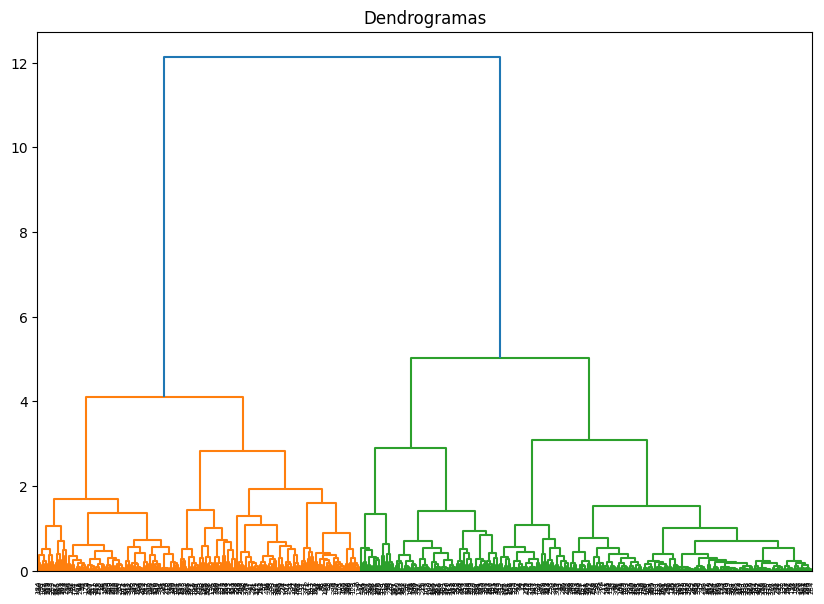

In [6]:
x= df_escalada
plt.figure(figsize=(10,7))
plt.title('Dendrogramas')
dendrograma= shc.dendrogram(shc.linkage(x,method='ward'))

Un dendrograma es un tipo de gráfico que muestra cómo se agrupan los elementos o datos en diferentes clusters. Es como un "árbol" que conecta los datos de manera jerárquica, comenzando desde los elementos individuales y luego agrupándolos paso a paso

Es una herramienta visual que ayuda a ver cómo los datos se agrupan de manera jerárquica, mostrando las relaciones de proximidad entre ellos

Gneramos un dendrograma utilizando un algoritmo de clusterizacion jerarquica sobre los datos normalizados **df_escalada:**

**x = df_escalada:** Se asigna el dataframe normalizado df_escalada a la variable x

**plt.figure(figsize=(10,7)):**

- Configura el tamaño de la figura del grafico que se va a generar

 - El tamaño es de 10 unidades de ancho por 7 unidades de alto

**plt.title('Dendrogramas'):** el título del gráfico como Dendrogramas

**dendrograma = shc.dendrogram(shc.linkage(x, method='ward')):**

**shc.linkage(x, method='ward'):**

- hace la clusterización jerárquica aglomerativa sobre el conjunto de datos x
 - El metodo ward es un tipo de medida de distancia para crear el dendrograma, donde el objetivo es minimizar la varianza dentro de cada cluster

**Mas metodos ademas del ward**

**Metodo single :**

- Este metodo calcula la distancia mínima entre los puntos de los dos clusters. En otras palabras, la distancia entre dos clusters es la distancia mas corta entre cualquier par de puntos de cada cluster

- Ventaja: Es útil cuando los clusters tienen formas alargadas o distribuciones más dispersas

- Desventaja: Puede ser sensible a los ruidos o outliers, ya que se basa solo en la distancia mínima.

**Metodo complete :**

- En este caso la distancia entre dos clusters se calcula como la distancia máxima entre los puntos de cada uno de los clusters es decir, la distancia máxima entre cualquier par de puntos uno de cada cluster.

- Ventaja: Tiende a formar clusters más compactos y homogéneos, lo que hace que sea útil cuando se desea evitar la formación de "clusters grandes" o "conglomerados"

- Desventaja: Es más sensible a los outliers que el método ward

**Metodo average :**
- Calcula la distancia entre dos clusters como el promedio de todas las distancias posibles entre puntos de los dos clusters. Este método intenta balancear los enfoques de single y complete proporcionando una combinación intermedia entre distancia mínima y máxima

- Ventaja: Es menos sensible a los outliers que single y complete

- Desventaja: Puede no ser tan efectivo en ciertos tipos de datos que tienen una estructura muy densa

**Resumen de Metodos de Enlace:**

- ward: minimiza la varianza dentro de los clusters. Es eficaz cuando los clusters son esféricos o compactos

- single: se basa en la distancia mínima entre los puntos de los clusters util para clusters alargados, pero sensible a outliers

- complete: utiliza la distancia máxima entre los puntos de los clusters ayudando a formar clusters compactos, pero también sensible a outliers

- average: usa el promedio de todas las distancias posibles entre los puntos de los dos clusters, balanceando las ventajas de los otros metodos

**shc.dendrogram():** crea el dendrograma una representación gráfica que muestra como se agrupan las observaciones a lo largo del proceso de clusterizacion. En el eje vertical se muestra la distancia entre los clusters a medida que se fusionan



# Aplicacion del Algoritmo

In [9]:
algoritmo= AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

algoritmo.fit(x)
pred=algoritmo.fit_predict(x)

**algoritmo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward'):**

- **n_clusters=3:** especifica que el algoritmo debe dividir los datos en 3 clusters

- **metric='euclidean':** Define que la medida de distancia utilizada para calcular las distancias entre puntos será la distancia euclidiana

**Tipos de metric*
- euclidean:

Utiliza la distancia euclidiana estándar, que es la distancia "recta" entre dos puntos en un espacio multidimensional



Es uno de los métodos más comunes y adecuados cuando los datos están distribuidos de manera más o menos uniforme

- manhattan:

Utiliza la distancia de Manhattan, que es la suma de las diferencias absolutas entre las coordenadas de dos puntos

Este método es útil cuando los datos están organizados en una cuadrícula, como en problemas de rutas o desplazamientos

- cosine:

Utiliza la distancia del coseno, que mide la diferencia en la orientación de los vectores en lugar de la magnitud de la distancia

Se usa comúnmente en problemas donde los datos son vectores de características, como en el procesamiento de texto como análisis de similitud de documentos

- precomputed:

Significa que ya tienes una matriz de distancias precomputada (una matriz que contiene las distancias entre cada par de puntos)

Es útil cuando ya has calculado las distancias entre los puntos de antemano, y quieres evitar calcularlas nuevamente.

- **linkage='ward':** indica que el metodo de agrupamiento sera "Ward", que minimiza la varianza dentro de los grupos al combinar los clusters. Este método tiende a crear clusters más equilibrados y compactos

Diferencia entre metric y linkage:

- **metric** se refiere a cómo se mide la distancia entre los clusters. La elección de la medida de distancia afecta la manera en que se agruparán los puntos

- **linkage** determina cómo se calcula la distancia entre los clusters es decir, cómo se decide cuándo y cómo fusionar dos clusters

**algoritmo.fit(x):**

ajusta el modelo de clusterizacion aglomerativa a los datos x. Esto significa que el algoritmo aprenderá las relaciones entre los puntos y cómo se deben agrupar en 3 clusters

**pred = algoritmo.fit_predict(x):**

**fit_predict(x) hace dos cosas:**

- fit(x): Ajusta el modelo a los datos x

- predict(x): Predice a que cluster pertenece cada punto de datos. Devuelve un array con los índices de los clusters asignados a cada punto

El resultado pred es un array que contiene el número del cluster asignado a cada fila de x. Por ejemplo, si pred[0] = 2, eso significa que la primera fila de x pertenece al cluster 2





# Verificamos contra las muestras

In [10]:
muestra_prediccion= algoritmo.fit_predict(muestra_escalada)

**algoritmo.fit_predict(muestra_escalada):**


- fit(): Ajusta el modelo de clusterización aglomerativa al conjunto de datos escalado muestra_escalada, lo que significa que el algoritmo analiza los datos y determina cómo agruparlos en clusters

- predict(): Después de ajustar el modelo, el método predice a qué cluster pertenece cada fila de datos en muestra_escalada.

**muestra_prediccion = ...:**

El resultado de fit_predict() es un array de etiquetas de cluster que indica a qué grupo pertenece cada una de las tres observaciones de muestra_escalada. Estas etiquetas (numeradas del 0 al 2, ya que especificaste n_clusters=3) se almacenan en la variable muestra_prediccion

In [11]:
for i, pred in enumerate(muestra_prediccion):
    print('Muestra',i,' se encuentra en el cluster: ',pred)

Muestra 0  se encuentra en el cluster:  1
Muestra 1  se encuentra en el cluster:  2
Muestra 2  se encuentra en el cluster:  0


Recorremos el array de predicciones **muestra_prediccion** y muestra a que cluster pertenece cada muestra V

**for i, pred in enumerate(muestra_prediccion)::**

- Utiliza **enumerate()** para iterar sobre el array **muestra_prediccion** donde i es el índice de la muestra (0, 1, 2, etc) y pred es la predicción del cluster para esa muestra (por ejemplo, 0, 1 o 2, dependiendo de cuántos clusters se definieron)

- **print('Muestra', i, 'se encuentra en el cluster:', pred):**
Para cada iteracion imprime el índice de la muestra (i) y el cluster al que pertenece (pred)